In [2]:
%reload_ext autoreload
%autoreload 2
from src.utils import oversample
from src.utils import train_eval_pytorch_model
from sklearn.model_selection import train_test_split
from src.models.cnn import ConvNetCustom, DeepCnnDataset
from torch import tensor
import torch

In [3]:
%%capture
from src.preprocessors.dasps import DaspsPreprocessor

trials = DaspsPreprocessor.get_trials(duration=2, autoreject=False)

In [4]:
oversampled_trials = oversample(trials)
oversampled_trials.shape

(4524,)

torch.Size([1, 1, 14, 250])
Layer 0: ZeroPad2d, Output Shape: torch.Size([1, 1, 14, 280])
Layer 1: Conv2d, Output Shape: torch.Size([1, 20, 14, 250])
Layer 2: LeakyReLU, Output Shape: torch.Size([1, 20, 14, 250])
Layer 3: Dropout, Output Shape: torch.Size([1, 20, 14, 250])
Layer 4: Conv2d, Output Shape: torch.Size([1, 40, 7, 250])
Layer 5: BatchNorm2d, Output Shape: torch.Size([1, 40, 7, 250])
Layer 6: LeakyReLU, Output Shape: torch.Size([1, 40, 7, 250])
Layer 7: MaxPool2d, Output Shape: torch.Size([1, 40, 7, 124])
Layer 8: Conv2d, Output Shape: torch.Size([1, 80, 7, 104])
Layer 9: LeakyReLU, Output Shape: torch.Size([1, 80, 7, 104])
Layer 10: Dropout, Output Shape: torch.Size([1, 80, 7, 104])
Layer 11: MaxPool2d, Output Shape: torch.Size([1, 80, 7, 52])
Layer 12: Conv2d, Output Shape: torch.Size([1, 160, 7, 42])
Layer 13: BatchNorm2d, Output Shape: torch.Size([1, 160, 7, 42])
Layer 14: LeakyReLU, Output Shape: torch.Size([1, 160, 7, 42])
Layer 15: Dropout, Output Shape: torch.Size([1,

/var/folders/wg/8xzwtj0n6fd93r4pqlr_bv1c0000gn/T/ipykernel_58589/4105425019.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = tensor(data, dtype=torch.float32)


  0%|          | 0/30 [00:00<?, ?it/s]

/Users/jakubblaha/Documents/thesis/thesis-python/src/utils.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = tensor(data, dtype=torch.float32)


Layer 0: ZeroPad2d, Output Shape: torch.Size([32, 1, 14, 280])
Layer 1: Conv2d, Output Shape: torch.Size([32, 20, 14, 250])
Layer 2: LeakyReLU, Output Shape: torch.Size([32, 20, 14, 250])
Layer 3: Dropout, Output Shape: torch.Size([32, 20, 14, 250])
Layer 4: Conv2d, Output Shape: torch.Size([32, 40, 7, 250])
Layer 5: BatchNorm2d, Output Shape: torch.Size([32, 40, 7, 250])
Layer 6: LeakyReLU, Output Shape: torch.Size([32, 40, 7, 250])
Layer 7: MaxPool2d, Output Shape: torch.Size([32, 40, 7, 124])
Layer 8: Conv2d, Output Shape: torch.Size([32, 80, 7, 104])
Layer 9: LeakyReLU, Output Shape: torch.Size([32, 80, 7, 104])
Layer 10: Dropout, Output Shape: torch.Size([32, 80, 7, 104])
Layer 11: MaxPool2d, Output Shape: torch.Size([32, 80, 7, 52])
Layer 12: Conv2d, Output Shape: torch.Size([32, 160, 7, 42])
Layer 13: BatchNorm2d, Output Shape: torch.Size([32, 160, 7, 42])
Layer 14: LeakyReLU, Output Shape: torch.Size([32, 160, 7, 42])
Layer 15: Dropout, Output Shape: torch.Size([32, 160, 7, 42]

/Users/jakubblaha/Documents/thesis/thesis-python/src/utils.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = model.forward(tensor(data, dtype=torch.float32))


Layer 12: Conv2d, Output Shape: torch.Size([32, 160, 7, 42])
Layer 13: BatchNorm2d, Output Shape: torch.Size([32, 160, 7, 42])
Layer 14: LeakyReLU, Output Shape: torch.Size([32, 160, 7, 42])
Layer 15: Dropout, Output Shape: torch.Size([32, 160, 7, 42])
Layer 16: MaxPool2d, Output Shape: torch.Size([32, 160, 7, 14])
Layer 17: Conv2d, Output Shape: torch.Size([32, 160, 1, 14])
Layer 18: BatchNorm2d, Output Shape: torch.Size([32, 160, 1, 14])
Layer 19: LeakyReLU, Output Shape: torch.Size([32, 160, 1, 14])
Layer 20: MaxPool2d, Output Shape: torch.Size([32, 160, 1, 4])
Layer 21: Flatten, Output Shape: torch.Size([32, 640])
Layer 22: Linear, Output Shape: torch.Size([32, 2])
Layer 23: LogSoftmax, Output Shape: torch.Size([32, 2])
Layer 0: ZeroPad2d, Output Shape: torch.Size([32, 1, 14, 280])
Layer 1: Conv2d, Output Shape: torch.Size([32, 20, 14, 250])
Layer 2: LeakyReLU, Output Shape: torch.Size([32, 20, 14, 250])
Layer 3: Dropout, Output Shape: torch.Size([32, 20, 14, 250])
Layer 4: Conv2d,

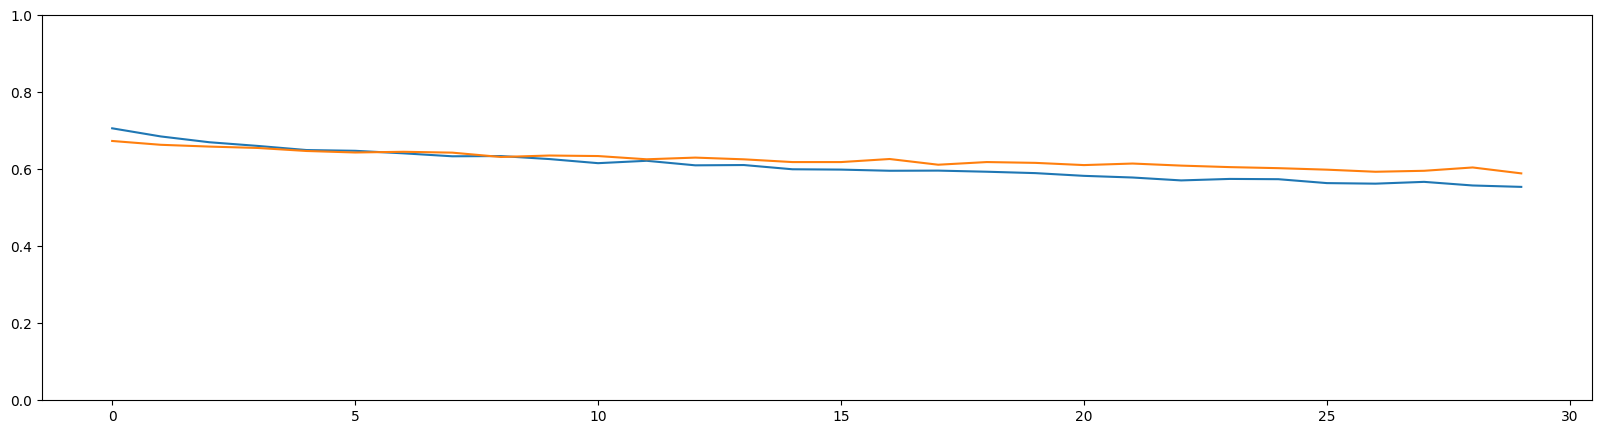

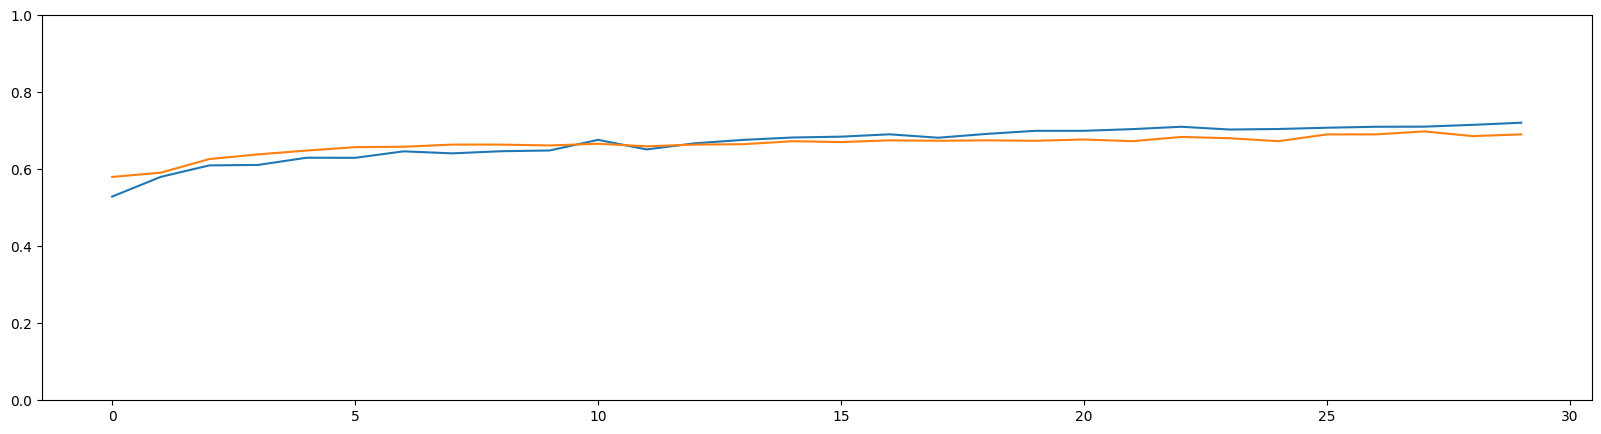

Avg test acc last 10 epochs:  0.6844199


In [5]:
seq_len = trials[0].epoch.get_data().shape[2]

trials_train, trials_test = train_test_split(oversampled_trials, train_size=0.8)

max_len = 250
channels = list(range(0, 14))

train_dataset = DeepCnnDataset(trials_train, max_len, channels)
test_dataset = DeepCnnDataset(trials_test, max_len, channels)

model = ConvNetCustom(seq_len, 2, dropout=0.2)

data = train_dataset[0][0].unsqueeze(0)
print(data.shape)
data = tensor(data, dtype=torch.float32)
model.forward(data)

train_eval_pytorch_model(model, train_dataset, test_dataset, num_epochs=30, learning_rate=0.00001)